# Домашнее задание 1

In [1]:
import networkx as nx

## Часть 1: анализ графа

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Откройте с помощью `networkx.read_gml` файл `netscience.gml` из задания на Gephi, при этом не указывайте при импорте “label=None”, чтобы нормально загрузились имена учёных — метки вершин.

In [3]:
G = nx.read_gml(r'/content/drive/MyDrive/ДЗ/Теория графов/netscience.gml')

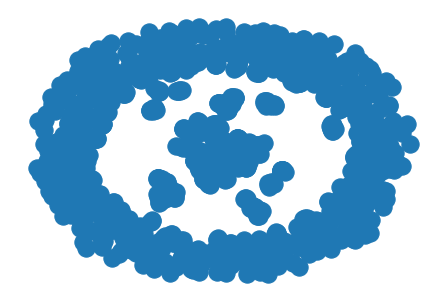

In [4]:
nx.draw(G)

Средствами `networkx` выведите (сделайте `print` количество вершин и рёбер графа.

In [5]:
print(f"количество вершин  {G.number_of_nodes()}")
print(f"количество ребер  {G.number_of_edges()}")

количество вершин  1589
количество ребер  2742


Средствами `networkx` найдите количество вершин в самой большой компоненте связности графа.

In [6]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
G0.number_of_nodes()

379

Сколько изолированных вершин в графе?

In [7]:
len(list(nx.isolates(G)))

128

Нарисуйте с помощью `networkx.draw_spring` единственную 21-вершинную компоненту связности графа. Может пригодиться метод `subgraph`, возвращающий подграф заданного графа, порождённый заданным множеством вершин.

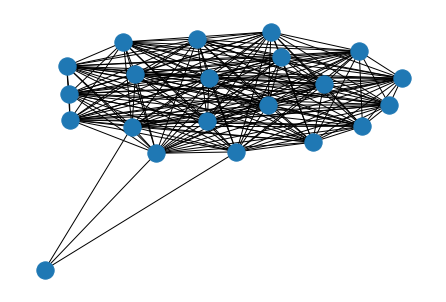

In [32]:
dict_ = {}
for ind, item in enumerate(list(nx.connected_components(G))):
  dict_[ind] = len(item)


indx_21 = list(dict_.values()).index(21)
G_21 = list(list(nx.connected_components(G))[indx_21])

nx.draw_spring(G.subgraph(G_21))

Найдите с помощью networkx (см. [документацию](https://networkx.github.io/documentation/stable/reference/algorithms/clique.html)) размер максимальной клики в упомянутой выше 21-вершинной компоненте связности.

In [38]:
from networkx.algorithms.approximation import clique
sub_G_21 = G.subgraph(G_21)
len(clique.max_clique(sub_G_21))

20

## Часть 2: построение графа

Создайте с нуля (только с помощью `add_nodes_from` и `add_edges_from`) граф типа `lollipop` (но без использования встроенной в `networkx` функции `lollipop_graph`) — клику на 10 вершинах, к которой приделана цепь на 6 вершинах. Нарисуйте этот граф наиболее подходящим по Вашему мнению алгоритмом, предоставляемым `networkx` — поэкспериментируйте.


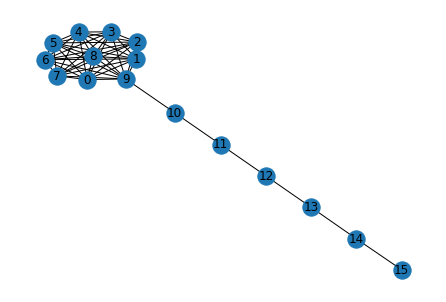

In [39]:
G = nx.lollipop_graph(10, 6)
nx.draw_kamada_kawai(G, with_labels=True)

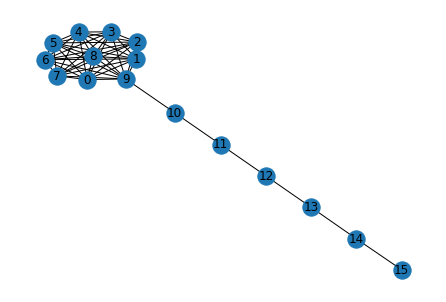

In [40]:
from itertools import combinations
G = nx.Graph()
G.add_nodes_from(range(16))
G.add_edges_from(combinations(range(10), 2))

G.add_edges_from([(i, i+1) for i in range(9, 15)])
nx.draw_kamada_kawai(G, with_labels=True)

Создайте граф, который получается из цикла на 10 вершинах добавлением одного ребра между какой-нибудь парой диаметрально противоположных вершин. Нарисуйте этот граф наиболее подходящим по Вашему мнению алгоритмом, предоставляемым networkx — поэкспериментируйте.

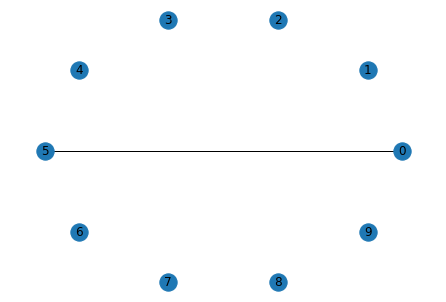

In [42]:
G = nx.Graph()
G.add_nodes_from(range(10))
G.add_edge(0, 5)
nx.draw_circular(G, with_labels=True)

## Часть 3: жадный алгоритм раскраски

Найдите для заданного `networkx`-графа $G$ раскраску не более, чем в $\Delta(G)$ цветов с помощью рассказанного на лекции «жадного» алгоритма. Технически раскраска — это словарь, в котором для каждой вершины указан её номер цвета от $1$ до $\Delta(G)$.

In [85]:
def num_in_color_list(color_list):
    color_set = set(color_list)
    count = 1
    while True:
        if count not in color_set:
            return count
        count += 1

num_in_color_list([])

1

In [86]:
def greedy_coloring(G):
    color = dict()
    for node in G.nodes():
        used_neighbour_colors = [color[nbr] for nbr in list(G.neighbors(node))
                                 if nbr in color]
        color[node] =  num_in_color_list(used_neighbour_colors)
    return color

In [88]:
# Простой тест алгоритма раскраски (запустите перед отправкой):
G = nx.random_regular_graph(7, 500, 2020)

coloring = greedy_coloring(G)

assert (
    max(coloring.values()) <= 7
    and
    min(coloring.values()) >= 1
    and 
    all(coloring[u] != coloring[v] for u,v in G.edges())
)

[69, 260, 163, 323, 19, 304, 316, 419, 138, 472, 464, 141, 409, 288, 398, 38, 350, 0, 55, 298, 369, 46, 345, 48, 259, 105, 310, 344, 463, 145, 309, 75, 97, 132, 189, 249, 84, 273, 57, 164, 6, 287, 192, 359, 68, 474, 327, 465, 172, 296, 246, 291, 137, 173, 215, 394, 15, 148, 93, 383, 155, 391, 400, 229, 245, 263, 479, 237, 373, 56, 330, 490, 434, 73, 92, 282, 496, 211, 458, 18, 320, 199, 166, 413, 407, 470, 101, 488, 250, 341, 187, 364, 43, 156, 271, 161, 487, 139, 31, 196, 222, 252, 89, 342, 351, 107, 218, 274, 9, 322, 365, 103, 35, 424, 24, 332, 233, 174, 204, 486, 272, 308, 95, 119, 499, 403, 32, 395, 224, 374, 216, 112, 475, 188, 116, 435, 182, 134, 460, 45, 340, 52, 77, 41, 175, 337, 459, 30, 162, 195, 484, 54, 349, 59, 40, 81, 3, 251, 269, 333, 397, 408, 78, 454, 305, 423, 451, 334, 455, 90, 387, 456, 124, 441, 4, 102, 66, 382, 29, 106, 299, 205, 44, 401, 94, 50, 127, 244, 115, 446, 170, 482, 361, 14, 147, 236, 300, 209, 114, 98, 415, 480, 346, 133, 279, 384, 476, 168, 306, 154, 3